<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/Gaussian_Mixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

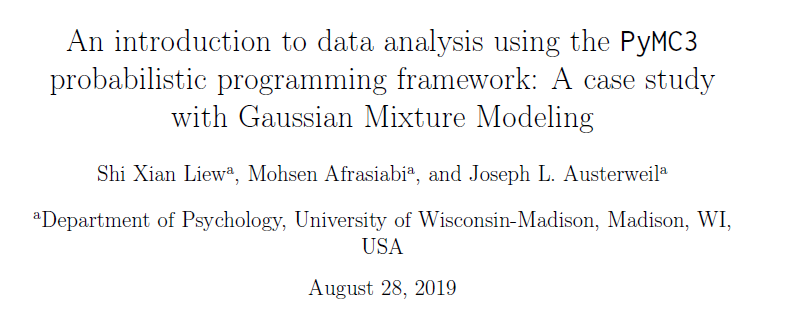

In [ ]:
!pip install arviz==0.6.1
!pip install pymc3==3.8

import arviz as az
import pymc3 as pm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import theano.tensor as tt

     |████████████████████████████████| 1.4MB 12.2MB/s 
     |████████████████████████████████| 4.3MB 51.0MB/s 
     |████████████████████████████████| 296kB 50.0MB/s 
     |████████████████████████████████| 911kB 14.3MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


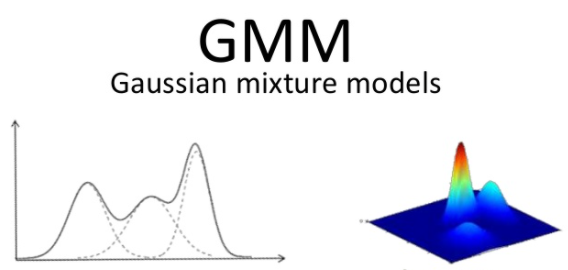

In [ ]:
# Seed the rng for exact reproducible results
seed = 68492
np.random.seed(seed)

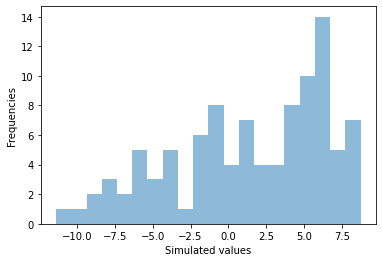

In [ ]:
## Generate data with K components.
# Means, standard deviations, proportions
mus = [ 0, 6,-5]
sigmas = [ 1, 1.5, 3]
ps = [.2, .5,.3]   # mixture proportion

# Total amount of data
N = 100

# Stack data into a single array
y = np.hstack([np.random.normal(mus[0], sigmas[0], int(ps[0]*N)),
  np.random.normal(mus[1], sigmas[1], int(ps[1]*N)),
  np.random.normal(mus[2], sigmas[2], int(ps[2]*N))])

## Plot the data as a histogram
plt.hist(y, bins=20, alpha=0.5)
# Add axes labels
plt.xlabel('Simulated values')
plt.ylabel('Frequencies')
plt.show()


# Model specification: Priors and Likelihoods

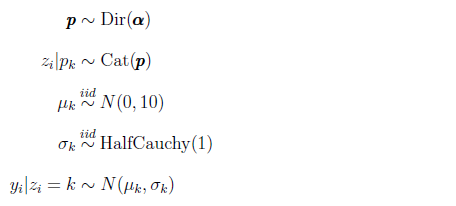

In [ ]:
## Build model
gmm = pm.Model()

K = 2  # number of components

with gmm:
  # Prior over z
  p = pm.Dirichlet('p', a=np.array([1.]*K))

  # z is the component that the data point is being sampled from.
  # Since we have N data points, z should be a vector with N elements.
  z = pm.Categorical('z', p=p, shape=N)

  # Prior over the component means and standard deviations
  mu = pm.Normal('mu', mu=0., sd=10., shape=K)
  sigma = pm.HalfCauchy('sigma', beta=1., shape=K)

  # Specify the likelihood
  Y_obs = pm.Normal('Y_obs', mu=mu[z], sd=sigma[z], observed=y)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Run sampler
with gmm:
  # Specify the sampling algorithms to use
  #  step1 = pm.NUTS(vars=[p, mu, sigma])
  #  step2 = pm.ElemwiseCategorical(vars=[z])
  
  # Start the sampler!
  trace = pm.sample(draws=2000, chains=1, random_seed=seed)
#  trace = pm.sample(draws=2000, chains=4, step=[step1, step2],random_seed=seed)

Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [sigma, mu, p]
>BinaryGibbsMetropolis: [z]
Sampling chain 0, 0 divergences: 100%|██████████| 2500/2500 [00:27<00:00, 90.82it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


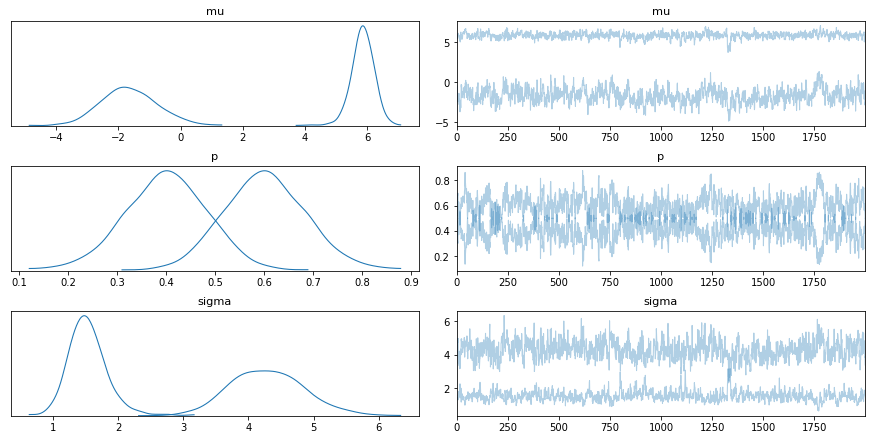

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Plot results
pm.traceplot(trace,  varnames=['mu','p','sigma']) # Specify which variables to plot
plt.show()

In [ ]:
pm.summary(trace, varnames=['mu','p','sigma'])

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu[0],5.847,0.377,5.163,6.513,0.021,0.015,318.0,318.0,364.0,379.0,NaN
mu[1],-1.668,0.913,-3.249,0.169,0.077,0.055,140.0,140.0,142.0,285.0,NaN
p[0],0.399,0.085,0.243,0.556,0.007,0.005,150.0,150.0,152.0,257.0,NaN
p[1],0.601,0.085,0.444,0.757,0.007,0.005,150.0,148.0,152.0,257.0,NaN
sigma[0],1.537,0.299,1.001,2.071,0.020,0.014,231.0,231.0,220.0,325.0,NaN
sigma[1],4.282,0.556,3.323,5.379,0.036,0.026,236.0,236.0,236.0,716.0,NaN
